In [2]:

%load_ext autoreload
%autoreload 2


In [3]:
import pandas as pd
from signlens.preprocessing.data import *
from signlens.preprocessing.preprocess import *
from sklearn.model_selection import train_test_split
from signlens.model.model import *
from tensorflow.keras.optimizers import Adam
from signlens.params import *
from utils.model_utils import *

In [5]:
!direnv reload

In [6]:
train=load_data_subset_csv(balanced=True,num_signs=10)

File already exists, loaded matching 'sequence_id' rows.
Size reduced from 86175 to 3210 (3.7%)


In [7]:
y=label_dictionnary(train)

In [8]:
X, X_test, y_t, y_test = train_test_split(train.file_path, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y_t, test_size=0.2, random_state=42, stratify=y_t)

In [10]:
X_train_sparse=group_pad_sequences(X_train)
X_val_sparse=group_pad_sequences(X_val)
X_test_sparse=group_pad_sequences(X_test)


In [135]:
adam=Adam(learning_rate=0.0005)
model=initialize_model(num_classes=y.shape[1])
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


/home/wailmouro/.pyenv/versions/3.10.6/envs/signlens/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [139]:
X_train_data=np.array([matrix.toarray().reshape(100, 75, 3) for matrix in X_train_sparse])
X_val_data=np.array([matrix.toarray().reshape(100, 75, 3) for matrix in X_val_sparse])
X_test_data=np.array([matrix.toarray().reshape(100, 75, 3) for matrix in X_test_sparse])

In [ ]:
model_trained, history=train_model(model,X_train_data,y_train,patience=10,verbose=1,batch_size=32,validation_data=[X_val_data,y_val])

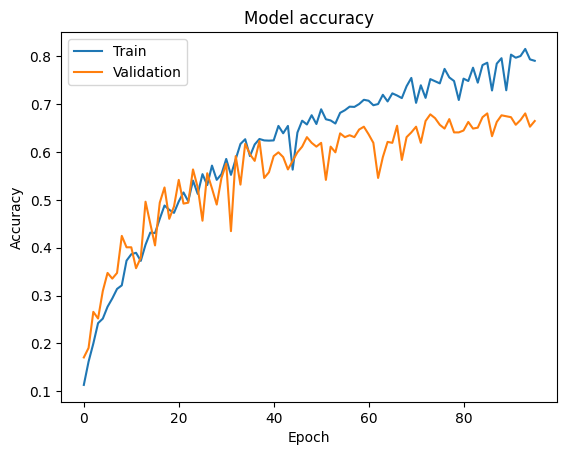

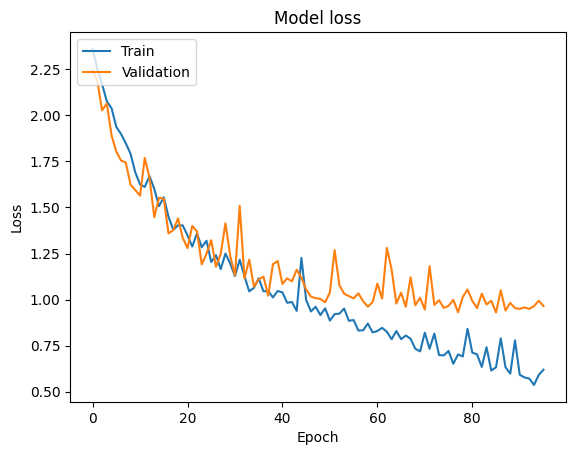

In [218]:
plot_history(history)

In [219]:
evaluate_model(model,X_test_data,y_test)


Evaluating model on 630 rows...
✅ Model evaluated, loss: 1.07


{'accuracy': 0.6380952596664429, 'loss': 1.0722661018371582}